## Objective
Gain insights about a datasets by using various visualizations.

## Things To Learn
* Working with _seaborn_'s visualizations and their parameters.

## Submission Guidelines
* Your finished _Jupyter Notebook_ - both as `.ipynb` and exported `.pdf`.

# Background

The **_Palmer Penguin Data Set_** has been collected by Dr. Kristen Gorman at the _Palmer Station Long Term Ecological Research (LTER)_ Program. The raw data consisted of the following main features: _species, island, bill length_ (= _culmen length_, see figure below), _bill width, flipper length, body mass, sex, delta N-15, delta C-13_ - however, the last two features are often not included in the simplified data sets. Data has been collected from three different penguin species (_Adelie, Chinstrap_ and _Gentoo_) from three little islands offshore Anvers Island near the Antarctic Peninsula.

The data set is sometimes proposed as alternative to Fisher's _Iris_, due to latter being worn out and some controversies surrounding Fisher's views on _eugenics_.

<img src="./images/penguin_culmen_length_depth.png" align="left" width="500" />


# Tasks

## Task: Loading And Exploring The Data Set

You already know the drill: Time to import the required libraries and load/explore the data you'll be working with - but with a slight twist. This time you'll be loading the dataset from _seaborn_'s collection of example datasets.

1. Import the required libraries.
1. Print out all datasets _seaborn_ provides.
1. Load the data containing our penguins.
1. Perform some basic data exploration as usual. This should cover:
    * Some exemplary rows.
    * Basic information about the dataset.
    * Numerical statistics.
    * The number of observations per class.
    * A closer look at the features across the classes using _grouping_.

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns

# Print out all datasets seaborn provides
print(sns.get_dataset_names())

# Load the data containing our penguins
penguins = sns.load_dataset('penguins')

# Perform some basic data exploration
# Some exemplary rows
print(penguins.head())

# Basic information about the dataset
print(penguins.info())

# Numerical statistics
print(penguins.describe())

# The number of observations per class
print(penguins['species'].value_counts())

# A closer look at the features across the classes using grouping
print(penguins.groupby('species'))

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------ 

## Task: Dealing With Missing Values

1. Take a closer look at the missing values per column in our data.
1. Remove the **rows** missing values from the dataset.
    * Hint: Take a look at the `dropna` method.
1. Check the success of the operation using `info`!

In [3]:
# Take a closer look at the missing values per column in our data
print(penguins.isnull().sum())

# Remove the rows with missing values from the dataset
penguins_cleaned = penguins.dropna()

# Check the success of the operation using info
print(penguins_cleaned.info())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None


## Task: Create A Color Palette



Before you start creating neat visualizations, it's time to choose some appropriate colors:

1. Plot the palette `cool` (sounds suitable for Antarctica, right?), that is included in _seaborn_.
1. Create your own **qualitative** palette using colors from the [_xkcd color survey_](assets/xkcd_color_survey.html).
    * Since we have three species, we need three, easily distinguishable colors.
1. Set your palette as the default for all plots.

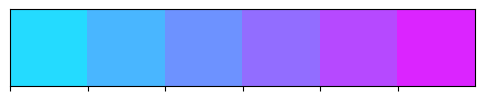

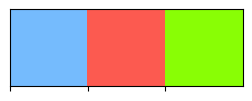

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the palette 'cool'
sns.palplot(sns.color_palette("cool"))
plt.show()

# Create your own qualitative palette using colors from the xkcd color survey
xkcd_colors = ['xkcd:sky blue', 'xkcd:coral', 'xkcd:lime green']
custom_palette = sns.color_palette(xkcd_colors)

# Set your palette as the default for all plots
sns.set_palette(custom_palette)
sns.palplot(custom_palette)
plt.show()

## Task: _Boxes_, _Swarms_ And _Bars_

1. Create _box plots_ for the _bill depth_ for all species. Outliers shall be marked for values below the _1st percentile_ and above the _99th percentile_ respectively.
1. Combine _box plots_ and _swarm plots_ for the _bill depth_.
    * Use a lighter color (e.g. `lightgray`) for better readability.
1. Plot the _mean bill depth_ by species using a _bar plot_.

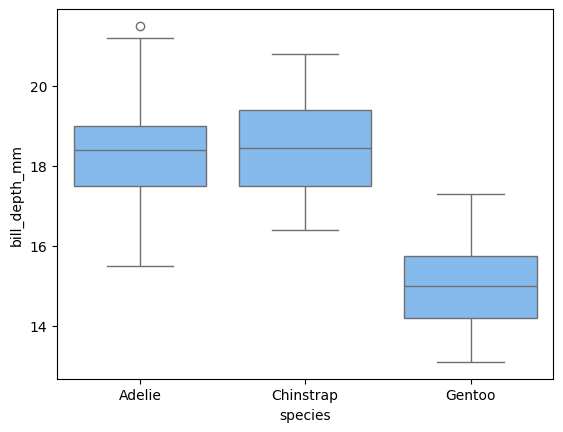

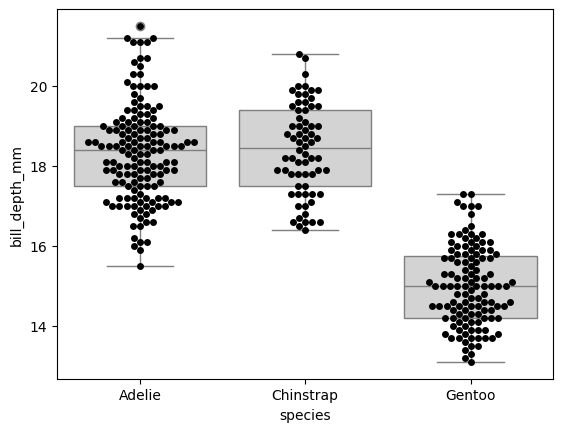

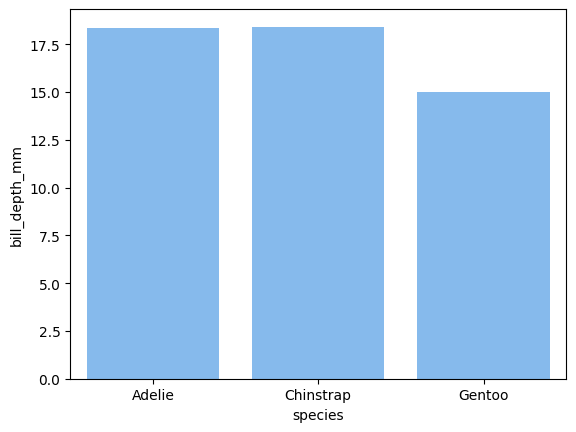

In [5]:
# Create box plots for the bill depth for all species
sns.boxplot(x='species', y='bill_depth_mm', data=penguins_cleaned, showfliers=True)
plt.show()

# Combine box plots and swarm plots for the bill depth
sns.boxplot(x='species', y='bill_depth_mm', data=penguins_cleaned, showfliers=True, color='lightgray')
sns.swarmplot(x='species', y='bill_depth_mm', data=penguins_cleaned, color='black')
plt.show()

# Plot the mean bill depth by species using a bar plot
mean_bill_depth = penguins_cleaned.groupby('species')['bill_depth_mm'].mean().reset_index()
sns.barplot(x='species', y='bill_depth_mm', data=mean_bill_depth)
plt.show()

## Task: _Violins_ And _Strips_

1. Use a _violin plot_ to show the distribution of the _bill length_ for all species.
1. Next, illustrate the distribution of the _bill length_ within each species. Use `split=True` in combination with `hue='sex'` to plot half-violins for male and female penguins respectively, using the `cool` palette.
1. Reuse the last plot - with a lighter color (as seen above) and the _quartiles_ in the violins' interior - and combine it with a _strip plot_.
1. Unfortunately, the last plot is misleading. The violins are plotted separately for each sex, whereas the strip plot is for male **and** female. It's obvious, that the distributions of the violins do not match the data of the strip plot. We can correct this by adding `dodge=True` to the strip plot. Use this to create _violin-strip_-combinations for all numeric features!

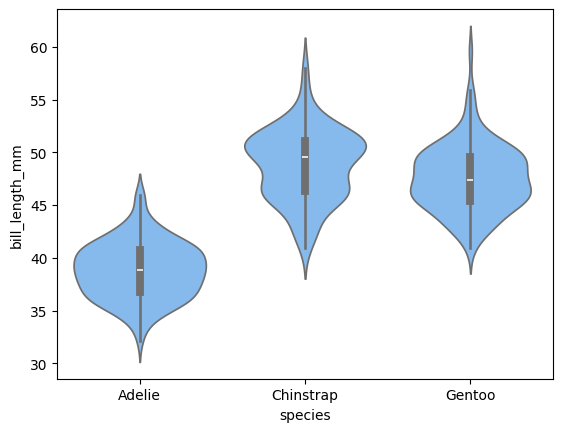

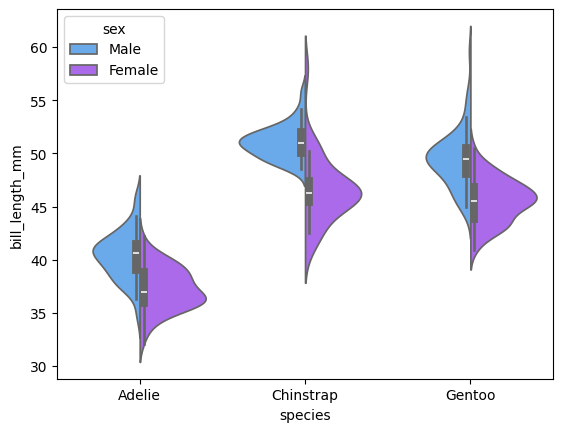

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3839809608.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='species', y='bill_length_mm', hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)


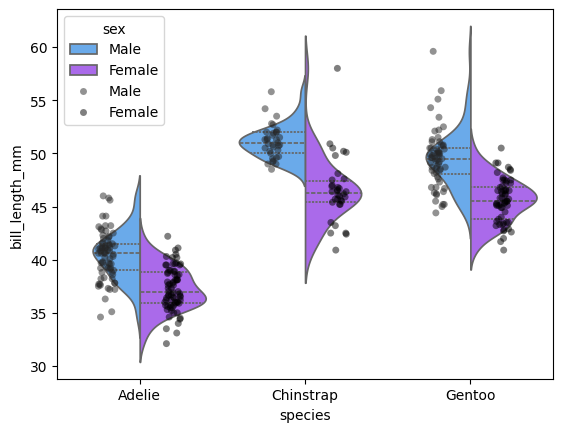

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3839809608.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='species', y=feature, hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)


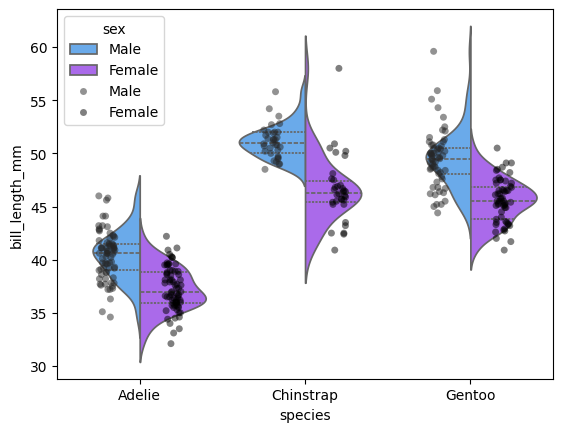

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3839809608.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='species', y=feature, hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)


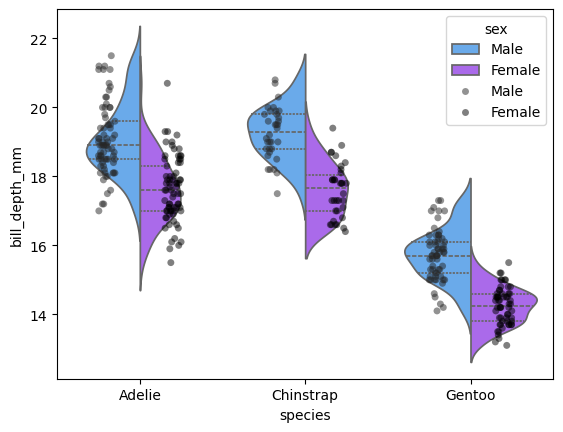

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3839809608.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='species', y=feature, hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)


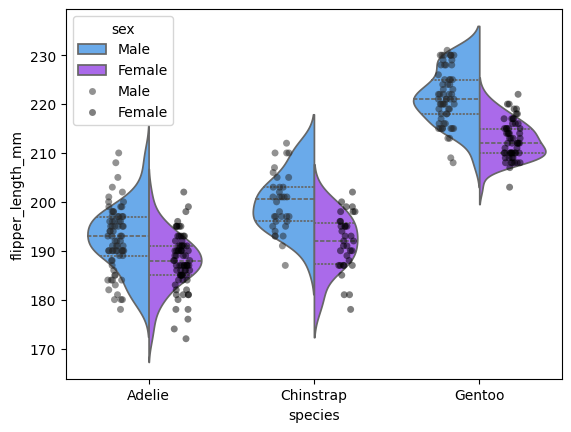

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3839809608.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='species', y=feature, hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)


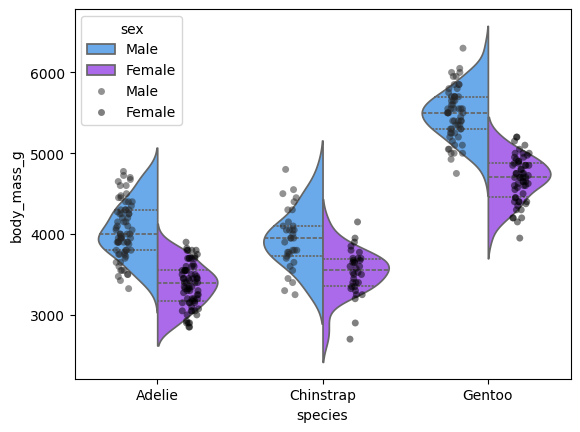

In [6]:
# Use a violin plot to show the distribution of the bill length for all species
sns.violinplot(x='species', y='bill_length_mm', data=penguins_cleaned)
plt.show()

# Illustrate the distribution of the bill length within each species using split=True and hue='sex'
sns.violinplot(x='species', y='bill_length_mm', hue='sex', data=penguins_cleaned, split=True, palette='cool')
plt.show()

# Reuse the last plot with a lighter color and the quartiles in the violins' interior, and combine it with a strip plot
sns.violinplot(x='species', y='bill_length_mm', hue='sex', data=penguins_cleaned, split=True, palette='cool', inner='quartile')
sns.stripplot(x='species', y='bill_length_mm', hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)
plt.show()

# Create violin-strip-combinations for all numeric features
numeric_features = penguins_cleaned.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    sns.violinplot(x='species', y=feature, hue='sex', data=penguins_cleaned, split=True, palette='cool', inner='quartile')
    sns.stripplot(x='species', y=feature, hue='sex', data=penguins_cleaned, dodge=True, color='black', alpha=0.5)
    plt.show()

## Task: _Histograms_

1. Create a _histogram_ for the _body masses_ of all species using 10 _buckets_.
1. Plot the _Kernel Density Estimation_ for the same feature with a _shade_ underneath.
1. Create combinations of histograms and _KDE_ plots for all numeric features.
1. Answer: Decide if a categorization by only one feature is feasible.

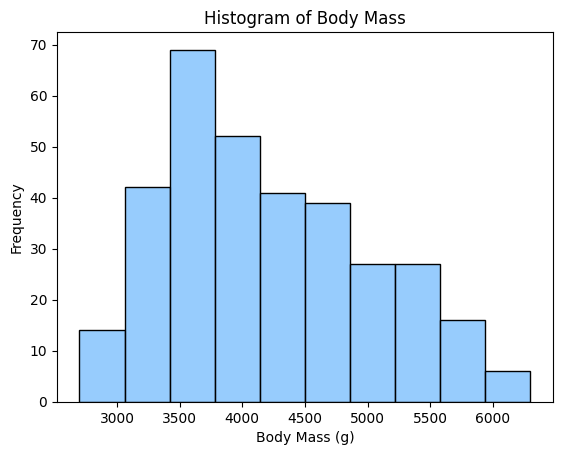

C:\Users\fabia\AppData\Local\Temp\ipykernel_35116\3494983613.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(penguins_cleaned['body_mass_g'], shade=True)


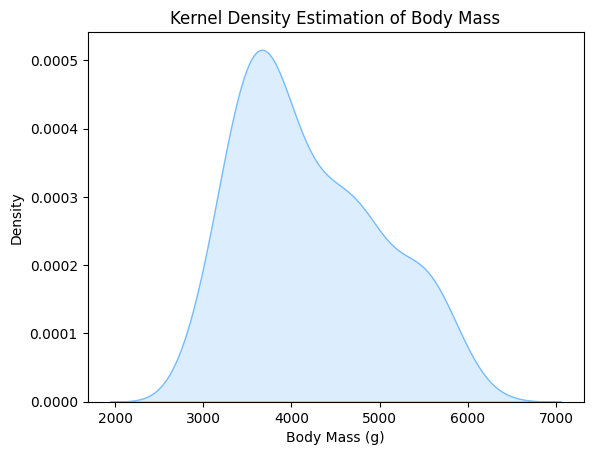

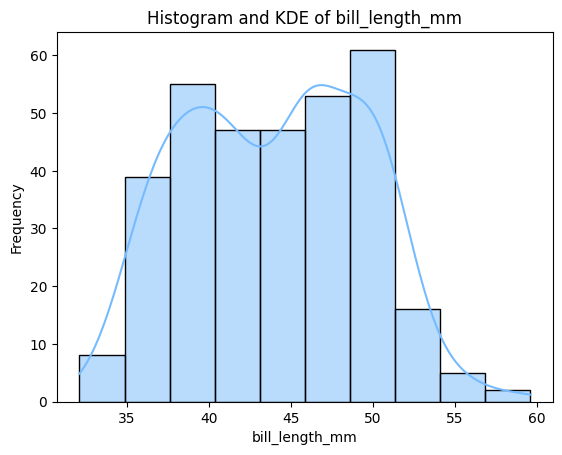

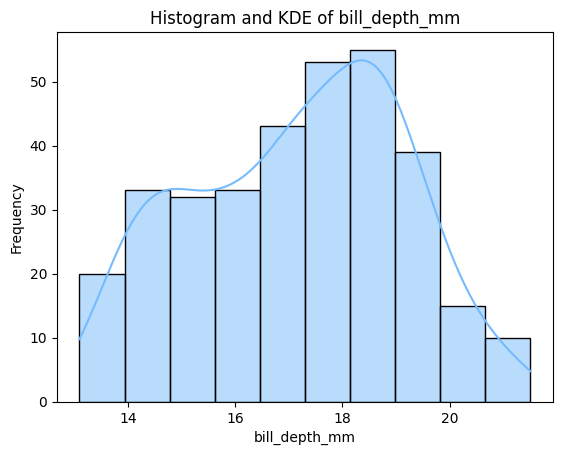

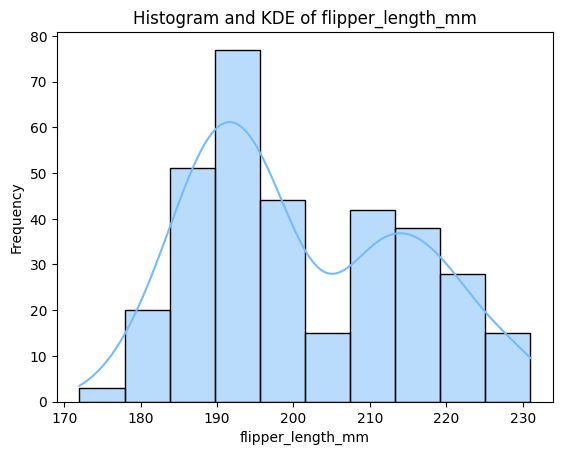

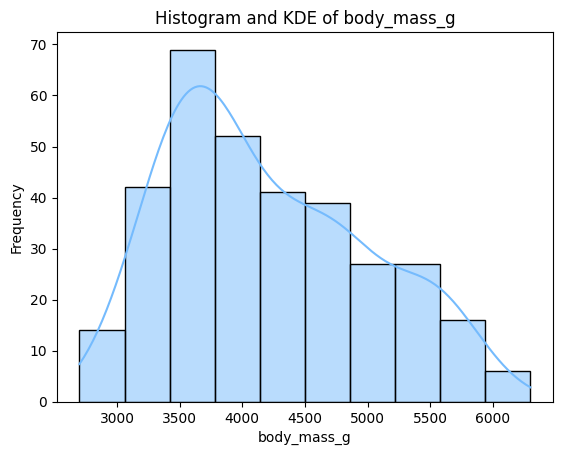

In [7]:
# Create a histogram for the body masses of all species using 10 buckets
sns.histplot(penguins_cleaned['body_mass_g'], bins=10, kde=False)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Body Mass')
plt.show()

# Plot the Kernel Density Estimation for the same feature with a shade underneath
sns.kdeplot(penguins_cleaned['body_mass_g'], shade=True)
plt.xlabel('Body Mass (g)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Body Mass')
plt.show()

# Create combinations of histograms and KDE plots for all numeric features
for feature in numeric_features:
    sns.histplot(penguins_cleaned[feature], bins=10, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram and KDE of {feature}')
    plt.show()

# Answer: Decide if a categorization by only one feature is feasible
# This will depend on the visualizations. Generally, it is difficult to categorize by only one feature as there might be overlap between species.

## Task: Correlation

1. Calculate the _correlation matrix_ of all features in the penguin data set.
1. Answer: What does a negative correlation between the _bill depth_ and _flipper length_ mean?
1. Afterwards, plot a _heatmap_ (with annotation) of the correlation matrix.

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


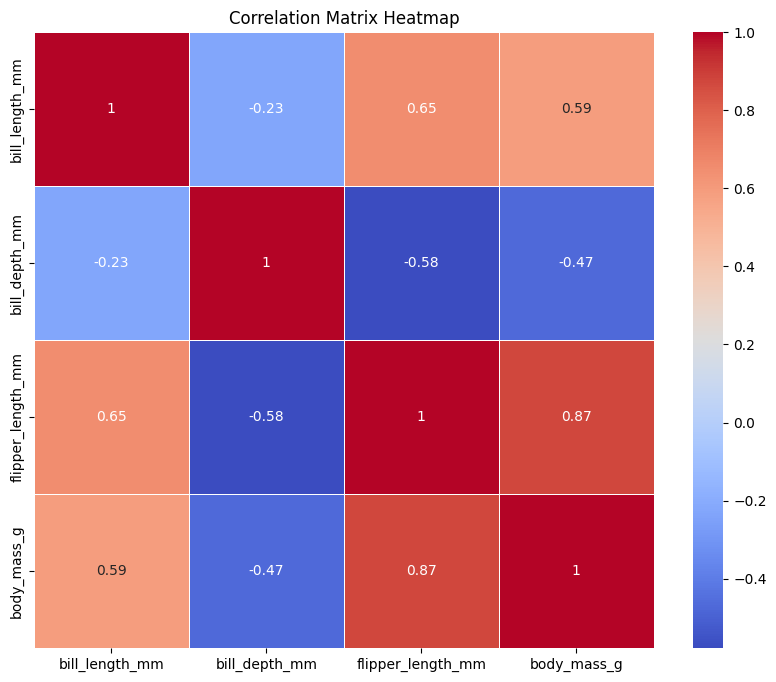

In [8]:
# Calculate the correlation matrix of all numeric features in the penguin data set
numeric_penguins = penguins_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_penguins.corr()
print(correlation_matrix)

# Plot a heatmap (with annotation) of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Task: Combinations Of Features 

1. Create a _pair plot_ to conveniently analyze all feature combinations at once.
1. Compare your answer from the last task (regarding the correlation of _bill depth_ and _flipper length_) with the visualization.
1. Use a _pair grid_ to again plot the pairwise relationships using _subplots_ that you find informative and aesthetically pleasing.
1. Answer: Investigate, which feature combination(s) allow(s) unambiguous classification of _Gentoo_ penguins.
1. Answer: Is the feature selection from the last question also applicable to distinguish _Adelie_ and _Chinstrap_? Which is the key feature to distinguish _Adelie_ and _Chinstrap_?

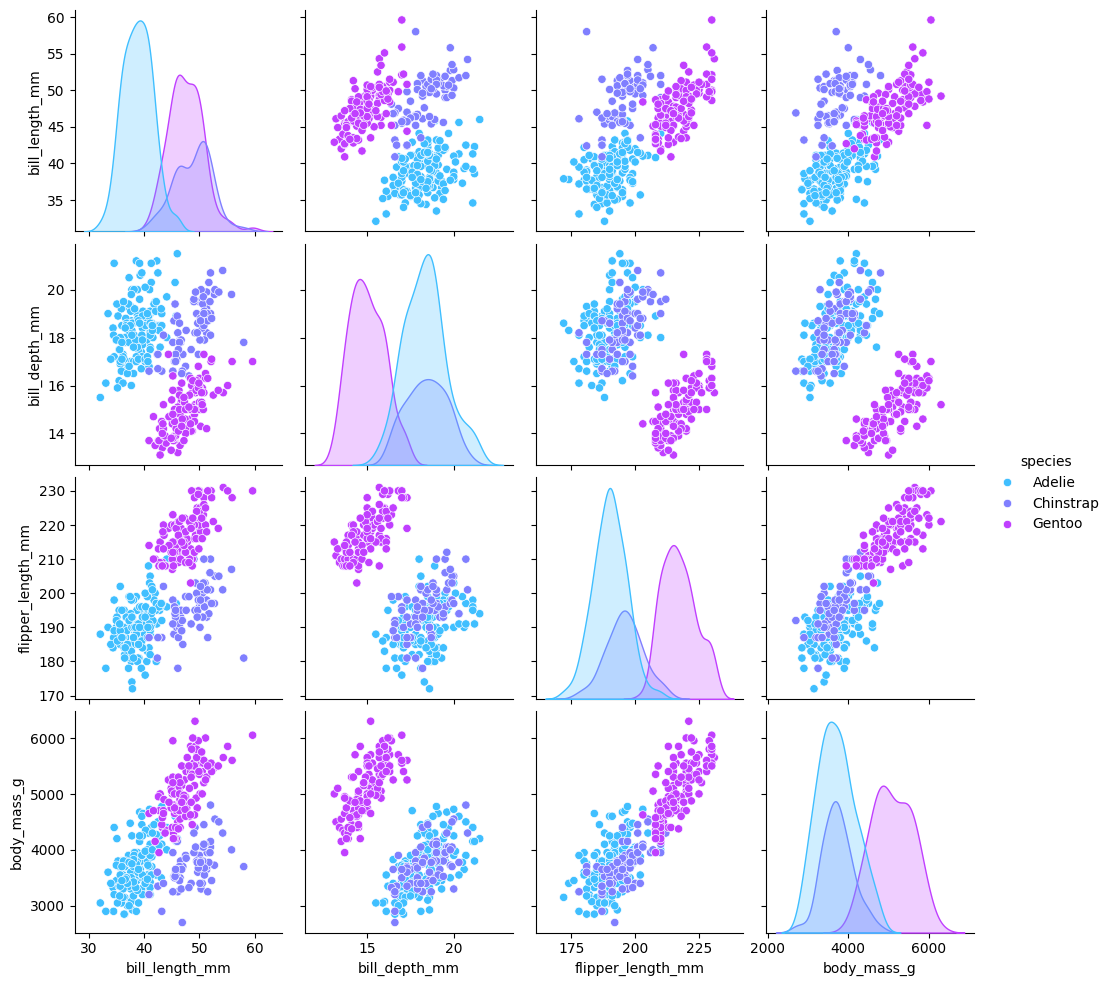

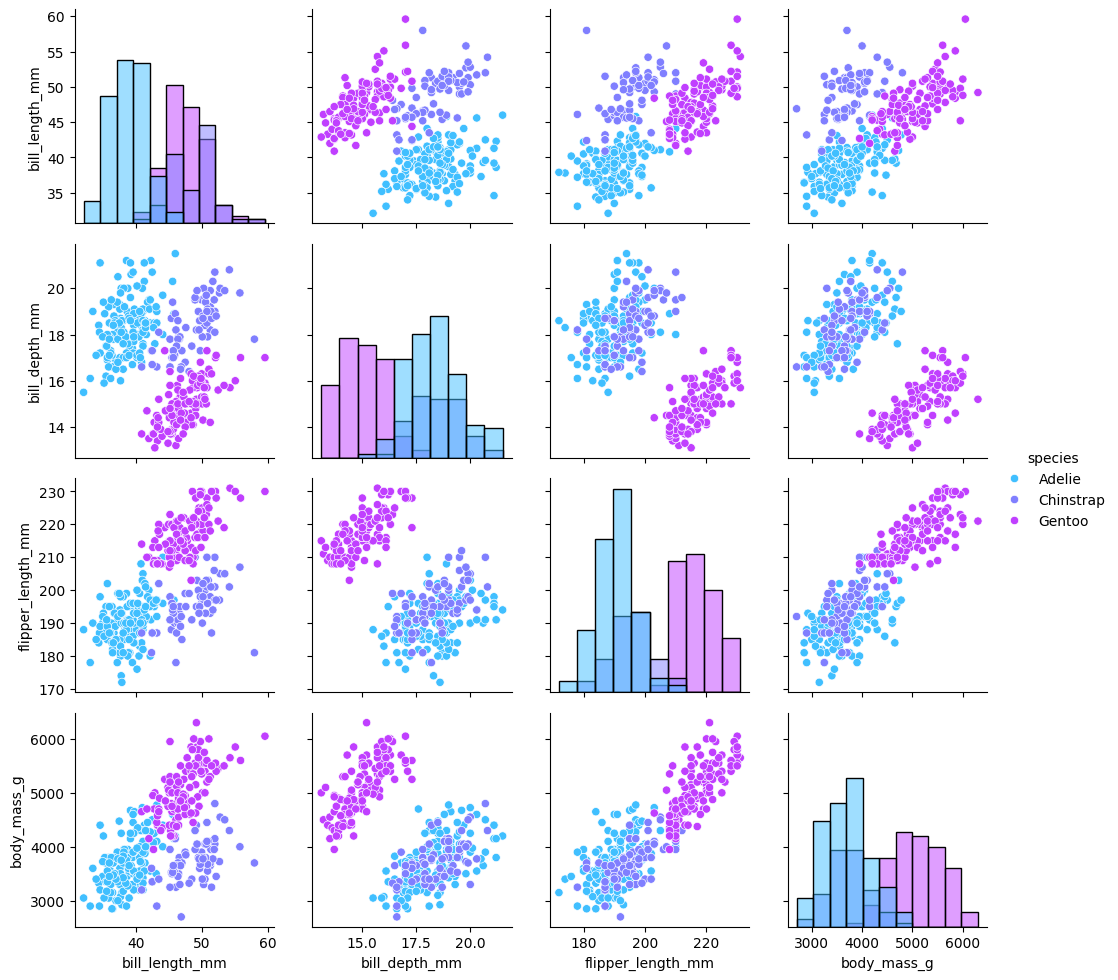

In [9]:
# Create a pair plot to conveniently analyze all feature combinations at once
sns.pairplot(penguins_cleaned, hue='species', palette='cool')
plt.show()

# Use a pair grid to again plot the pairwise relationships using subplots that you find informative and aesthetically pleasing
g = sns.PairGrid(penguins_cleaned, hue='species', palette='cool')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

# Answer: Investigate, which feature combination(s) allow(s) unambiguous classification of Gentoo penguins
# From the pair plot and pair grid, it can be observed that Gentoo penguins can be unambiguously classified using the combination of flipper length and body mass.

# Answer: Is the feature selection from the last question also applicable to distinguish Adelie and Chinstrap? Which is the key feature to distinguish Adelie and Chinstrap?
# The feature selection from the last question is not applicable to distinguish Adelie and Chinstrap. The key feature to distinguish Adelie and Chinstrap is bill length.

## Task: Bivariate Plots

1. Create a large _scatter plot_ for the two features, that are most suited to distinguish between _Adelie_ and _Chinstrap_.
1. Plot the same features using a _joint grid_ with _subplots_ that you find informative and aesthetically pleasing.

<img src="./images/scatter_censored.png" align="left" width="500" />
<img src="./images/joint_censored.png" align="left" width="500" />

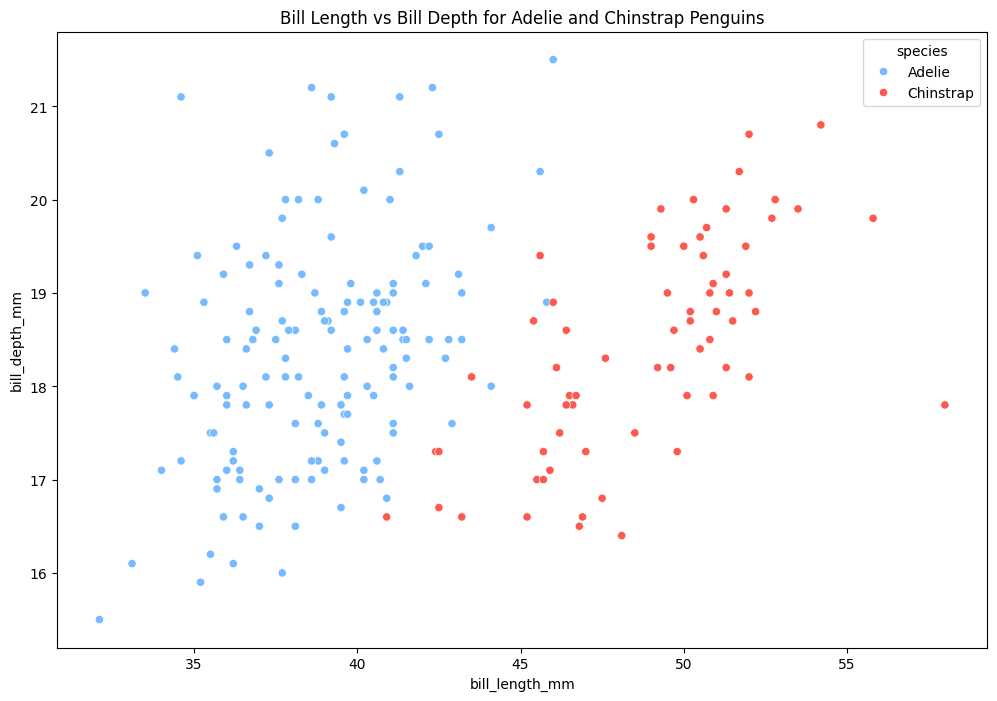

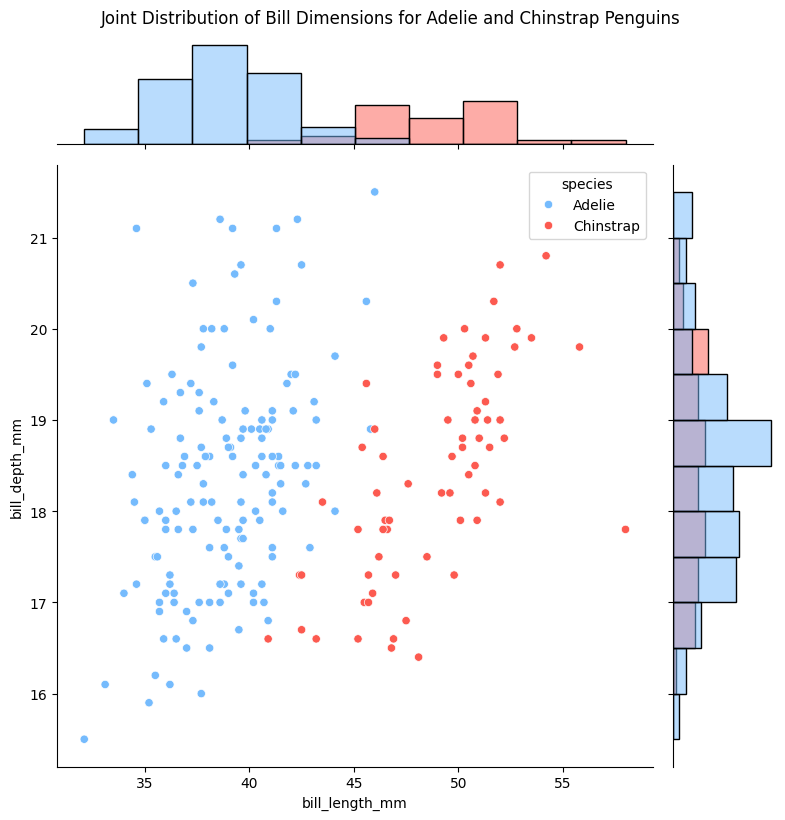

In [17]:
# Create a large scatter plot for Adelie and Chinstrap penguins
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=penguins_cleaned[penguins_cleaned['species'].isin(['Adelie', 'Chinstrap'])],
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=custom_palette[:2]
)
plt.title('Bill Length vs Bill Depth for Adelie and Chinstrap Penguins')
plt.show()

# Create a joint grid plot
g = sns.JointGrid(
    data=penguins_cleaned[penguins_cleaned['species'].isin(['Adelie', 'Chinstrap'])],
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=custom_palette[:2],
    height=8
)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)
plt.suptitle('Joint Distribution of Bill Dimensions for Adelie and Chinstrap Penguins', y=1.02)
plt.show()

## Task: _Facets_

1. Establish a plot consisting of three _KDE_ subplots to show the distribution of the species for each island. Each species shall appear in a different color within the plots.
1. Answer: Which species lives on all three islands?
1. Answer: Can you derive from the plots, which is the most abundant species in the dataset?

Hint: The size of the plots can (and in this case should) be increased using the `height` parameter.

c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

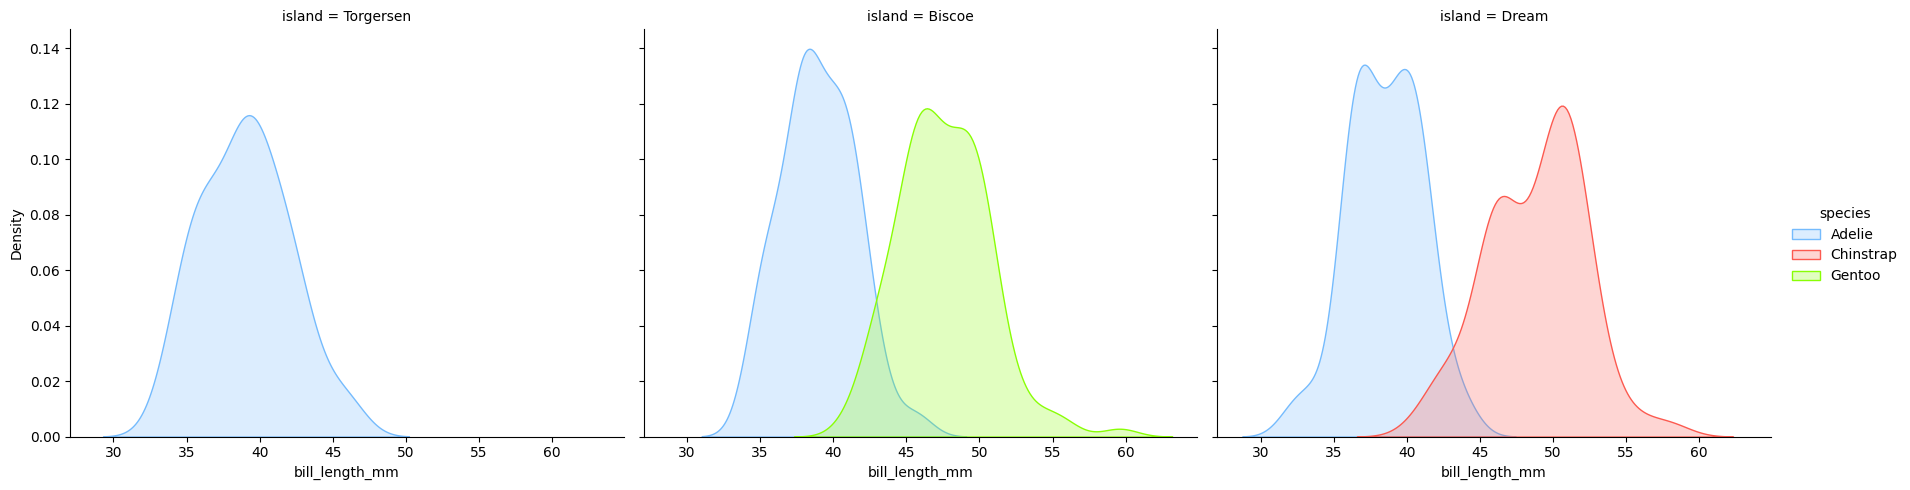

In [11]:
# Establish a plot consisting of three KDE subplots to show the distribution of the species for each island
g = sns.FacetGrid(penguins_cleaned, col="island", hue="species", height=5, aspect=1.2)
g.map(sns.kdeplot, "bill_length_mm", shade=True).add_legend()
plt.show()

# Answer: Which species lives on all three islands?
# From the plots, it can be observed that the Adelie species lives on all three islands.

# Answer: Can you derive from the plots, which is the most abundant species in the dataset?
# From the plots, it can be observed that the Adelie species is the most abundant species in the dataset.

## Task: _Cats_ And _Counts_

1. Now, establish a plot for the absolute numbers of penguins by island. You can use _catplots_ for that purpose.
1. Answer: Which species has the highest relative abundance on one of the islands?
1. Answer: Can one conclude, that _Gentoo_ is the most abundant species in the complete data set?
1. Check your answer to the last question by creating a simple (i.e. not _faceted_) _count plot_, illustrating the amount of penguins per species across all islands.

<img src="./images/count_censored.png" align="left" width="500" />

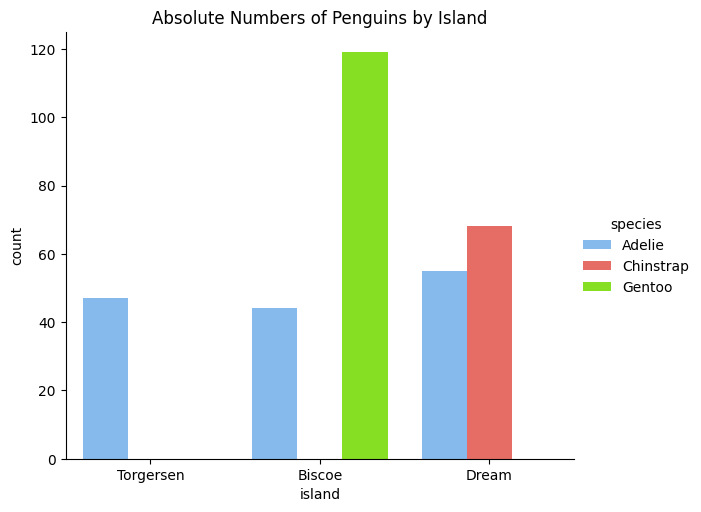

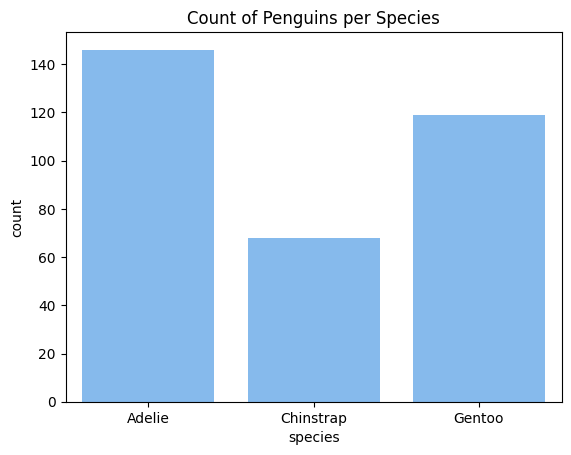

In [12]:
# Establish a plot for the absolute numbers of penguins by island using catplot
sns.catplot(x='island', hue='species', kind='count', data=penguins_cleaned, height=5, aspect=1.2)
plt.title('Absolute Numbers of Penguins by Island')
plt.show()

# Answer: Which species has the highest relative abundance on one of the islands?
# From the plot, it can be observed that the Gentoo species has the highest relative abundance on Biscoe island.

# Answer: Can one conclude, that Gentoo is the most abundant species in the complete data set?
# No, one cannot conclude that Gentoo is the most abundant species in the complete data set based on the relative abundance on one island.

# Check your answer to the last question by creating a simple (i.e. not faceted) count plot, illustrating the amount of penguins per species across all islands
sns.countplot(x='species', data=penguins_cleaned)
plt.title('Count of Penguins per Species')
plt.show()

## Task: More _Cats_

1. Again, use a _catplot_ (using the _cool_ palette) to investigate, whether the data set contains approximately as many male individuals as female for each species.
1. Afterwards establish a second plot, that shows the male-female _catplot_ for each island.
    * Hint: You'll need the `hue` parameter to add a _dimension_.

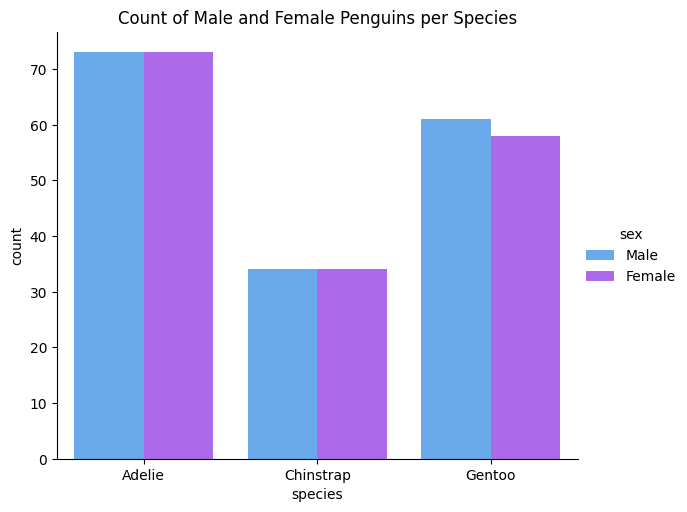

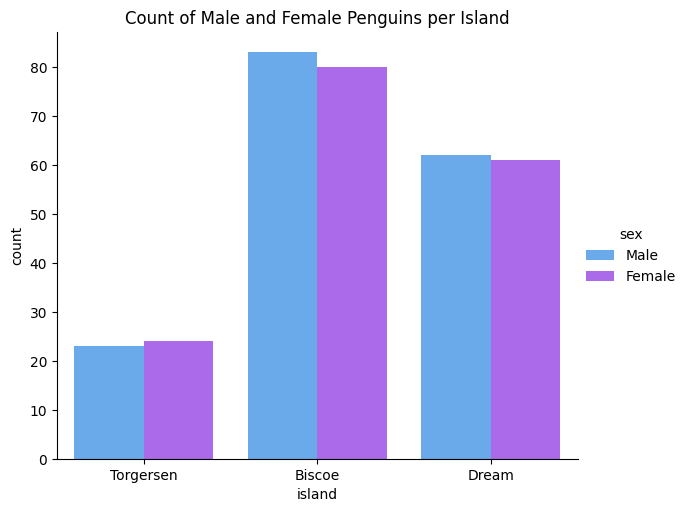

In [13]:
# Use a catplot (using the cool palette) to investigate whether the data set contains approximately as many male individuals as female for each species
sns.catplot(x='species', hue='sex', kind='count', data=penguins_cleaned, palette='cool', height=5, aspect=1.2)
plt.title('Count of Male and Female Penguins per Species')
plt.show()

# Establish a second plot that shows the male-female catplot for each island
sns.catplot(x='island', hue='sex', kind='count', data=penguins_cleaned, palette='cool', height=5, aspect=1.2)
plt.title('Count of Male and Female Penguins per Island')
plt.show()

## Task: Good Job!

For your last task: Load the contents of the file `good_job.csv` and display them using a _line plot_. Experiment with different markers and set the title of the plot to _Good Job!_ - see the end of the _demo notebook_ for a hint.

<img src="./images/good_job_censored.png" align="left" width="500" />

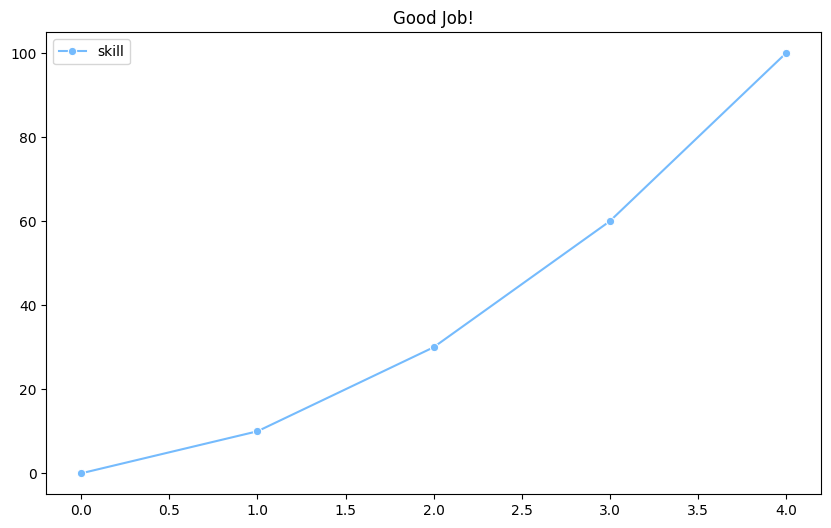

In [15]:
import pandas as pd

# Load the contents of the file good_job.csv
good_job_data = pd.read_csv('good_job.csv')

# Display the data using a line plot with different markers
plt.figure(figsize=(10, 6))
sns.lineplot(data=good_job_data, markers=True, dashes=False)
plt.title('Good Job!')
plt.show()